Datasets selected for analyses are from the free material provided by GAPMINDER.ORG, CC-BY LICENSE      
*Source: https://www.gapminder.org/data/*

**`Select an indicator > Society > War & Peace > Refugees > UNHCR Refugees`**       

**Selected datasets:      
&emsp;&emsp;    -`Asylum seekers by county of origin`       
&emsp;&emsp;    -`Asylum seekers by county of residence`       
&emsp;&emsp;    -`UNHCR refugees by county of origin`         
&emsp;&emsp;    -`UNHCR refugees by county of residence`**        

**Military expenditure as percentage of national GDP data:**      
**`Select an indicator > Society > War & Peace > Military expenditure`**        
*Source: https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import gc

In [2]:
os.getcwd()

'D:\\Applied-Plotting-Charting-Data-Representation-in-Python\\Capstone'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'as_from.csv',
 'as_in.csv',
 'military_expenditure_percent_of_gdp.csv',
 'Project.ipynb',
 'unhcr_refg_by_country_of_residence.csv',
 'unhcr_refg_from.csv']

In [54]:
# UNHCR refugees based on country of origin
unhcr_from = pd.read_csv("./unhcr_refg_from.csv")

# UNHCR refugees based on country of residence
unhcr_in = pd.read_csv("./unhcr_refg_by_country_of_residence.csv")

# military expenditure
mil_exp = pd.read_csv("./military_expenditure_percent_of_gdp.csv")

In [10]:
mil_exp.country.values

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Belize', 'Bolivia', 'Brazil', 'Brunei', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Cape Verde', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
       'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Iran', 'Iraq',

## ***Finding the top 20 countries that spend most on military expenses***

In [11]:
mean_exp = mil_exp.iloc[:, 1:mil_exp.shape[1]].mean(axis = 1)
mean_mil_exp = pd.Series(data = list(mean_exp) , index = list(mil_exp.country.values))

C:\Users\Anoban\AppData\Local\Temp\ipykernel_8312\3613348978.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_exp = mil_exp.iloc[:, 1:mil_exp.shape[1]].mean(axis = 1)


In [12]:
list(zip(mil_exp.country.values, mean_exp))[1:10]

[('Angola', 6.571470588235293),
 ('Albania', 2.6820512820512823),
 ('United Arab Emirates', 5.485),
 ('Argentina', 1.3927333333333336),
 ('Armenia', 3.5653571428571427),
 ('Australia', 2.0926666666666662),
 ('Austria', 1.0624888888888888),
 ('Azerbaijan', 3.301034482758621),
 ('Burundi', 3.4983750000000002)]

In [13]:
print("Countries that spends lowest and highest percentages of their national GDP on military are {} and {} \nwith perxentages {} % \
and {} % respectively.".format(mean_mil_exp.index[mean_mil_exp.argmin()], mean_mil_exp.index[mean_mil_exp.argmax()],
             mean_mil_exp.min(), mean_mil_exp.max()))

Countries that spends lowest and highest percentages of their national GDP on military are Costa Rica and Eritrea 
with perxentages 0.0 % and 22.636363636363637 % respectively.


In [14]:
top20 = mean_mil_exp.sort_values()[len(mean_mil_exp) -  20: len(mean_mil_exp)]

In [15]:
top20

Singapore                4.061026
Brunei                   4.142571
Iraq                     4.489200
Bahrain                  4.679487
Pakistan                 4.816000
United States            5.000444
Djibouti                 5.321895
United Arab Emirates     5.485000
Lebanon                  5.506000
Yemen                    5.632400
South Sudan              5.806667
Angola                   6.571471
Jordan                   8.073111
Qatar                    8.206842
Syria                    8.290882
Israel                   9.216000
Oman                    10.733333
Saudi Arabia            10.888333
Kuwait                  10.904359
Eritrea                 22.636364
dtype: float64

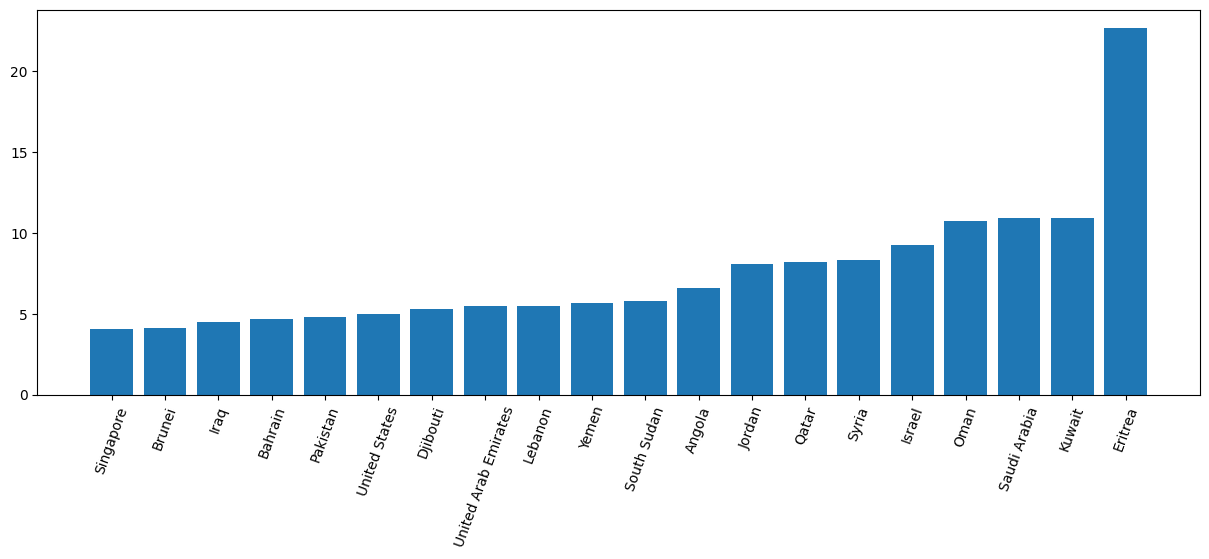

In [16]:
plt.figure(figsize = (15, 5))
plt.bar(height = top20.values, x = top20.index)
plt.xticks(rotation = 70)
plt.show()

## ***Refugees in these 20 countries***

In [17]:
top20.index

Index(['Singapore', 'Brunei', 'Iraq', 'Bahrain', 'Pakistan', 'United States',
       'Djibouti', 'United Arab Emirates', 'Lebanon', 'Yemen', 'South Sudan',
       'Angola', 'Jordan', 'Qatar', 'Syria', 'Israel', 'Oman', 'Saudi Arabia',
       'Kuwait', 'Eritrea'],
      dtype='object')

In [21]:
ind_refugees_in = np.where(unhcr_in.country.isin(top20.index) == True)[0]
ind_refugees_in

array([  1,   4,  17,  25,  45,  52,  81,  83,  86,  95,  97, 134, 135,
       146, 150, 153, 159, 167, 183, 190], dtype=int64)

In [58]:
unhcr_in = unhcr_in.iloc[ind_refugees_in, :].reset_index(drop = True)
unhcr_in

,country,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2k,23.4k,23.8k,15.5k,15.5k,15.5k,41.1k,39.9k,25.8k,25.8k
1,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,675,628,602,419,663,888,884,1170,1240,1330
2,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,199,289,294,310,246,270,255,262,251,256
3,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.3k,19.1k,20k,20.5k,19.4k,17.7k,17.6k,18.3k,19.6k,21.2k
5,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4720,3600,3170,2900,2550,2340,2390,2250,199,201
6,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.2k,98.8k,246k,271k,278k,262k,278k,283k,274k,270k
7,Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.2k,48.5k,48.2k,39.7k,32.9k,30.5k,25.7k,18.6k,16.1k,1900
8,Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,451k,303k,642k,654k,664k,685k,691k,715k,694k,703k
9,Kuwait,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,336,676,633,611,736,935,613,671,686,737


In [60]:
# let's just consider the years from 2000 to 2020

unhcr_in = pd.concat([unhcr_in.country, unhcr_in.loc[:, unhcr_in.columns[50:]]], axis = 1)
unhcr_in

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,12.1k,12.2k,12.2k,13.4k,14k,14k,13.1k,12.1k,12.7k,...,16.2k,23.4k,23.8k,15.5k,15.5k,15.5k,41.1k,39.9k,25.8k,25.8k
1,United Arab Emirates,560,554,165,160,106,104,176,161,204,...,675,628,602,419,663,888,884,1170,1240,1330
2,Bahrain,0,0,0,0,0,0,0,0,48,...,199,289,294,310,246,270,255,262,251,256
3,Brunei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Djibouti,23.2k,23.2k,21.7k,27k,18k,10.5k,9260,6650,9230,...,20.3k,19.1k,20k,20.5k,19.4k,17.7k,17.6k,18.3k,19.6k,21.2k
5,Eritrea,1980,2270,3620,3890,4240,4420,4620,5040,4860,...,4720,3600,3170,2900,2550,2340,2390,2250,199,201
6,Iraq,128k,128k,134k,46.7k,46.1k,50.2k,44.4k,42.4k,39.5k,...,35.2k,98.8k,246k,271k,278k,262k,278k,283k,274k,270k
7,Israel,4070,4160,4170,4170,564,598,829,1150,9120,...,41.2k,48.5k,48.2k,39.7k,32.9k,30.5k,25.7k,18.6k,16.1k,1900
8,Jordan,1060,1060,1200,1200,1100,962,500k,500k,500k,...,451k,303k,642k,654k,664k,685k,691k,715k,694k,703k
9,Kuwait,2780,1260,1520,1520,1520,1520,49,38.2k,38.2k,...,336,676,633,611,736,935,613,671,686,737


In [55]:
# let's repeat the same for unhchr_from
unhcr_from = unhcr_from.iloc[ind_refugees_in, :].reset_index(drop = True)
unhcr_from = pd.concat([unhcr_from.country, unhcr_from.loc[:, unhcr_from.columns[50:]]], axis = 1)
unhcr_from

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,434k,471k,435k,330k,229k,216k,206k,186k,171k,...,129k,19.3k,10.3k,9470,11.9k,8390,8290,8240,8180,8260
1,United Arab Emirates,17,18,29,16,70,31,261,305,255,...,484,580,84,84,91,103,137,169,155,191
2,Bahrain,92,46,49,50,52,40,56,65,73,...,213,294,274,344,422,461,497,540,557,554
3,Brunei,0,0,0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,0,0,20
4,Djibouti,1910,451,470,520,492,498,479,645,639,...,595,626,747,870,1060,1440,1760,2120,2350,2440
5,Eritrea,377k,333k,318k,124k,131k,144k,194k,209k,186k,...,252k,285k,308k,363k,407k,457k,486k,507k,504k,522k
6,Iraq,526k,531k,423k,369k,312k,262k,1.45M,2.31M,1.9M,...,1.43M,746k,401k,370k,264k,316k,363k,372k,336k,333k
7,Israel,414,361,561,626,670,624,876,1540,1490,...,1320,1330,1030,967,787,487,469,492,452,398
8,Jordan,915,773,1280,1150,1160,1780,1590,1780,1880,...,2240,2360,1620,1710,1840,1920,2120,2430,2310,2490
9,Kuwait,688,696,705,616,392,374,611,742,847,...,1110,1190,971,974,1080,1010,1100,1250,1300,1440


In [69]:
# damn! there are strings the numeric columns
# some dumbass entered 1000s as ks!
# a function to cast these into floats!

def CastToFloat(column):
    """
    A function that takes a Pandas DataFrame column as input, checks whether that any element in that column
    contains the character "k"and if so, removes that chracter, casts the value to a float and returns it multiplied by 1000!
    If the element does not have a "k" in it, just type casts the string to a float and returns it!
    eg: "123.65k" => 123650.0
    """
    result = list()
    for value in column:
        if "k" in str(value):
            result.append(float(value.replace("k", "")) * 1000)
        elif "M" in str(value):
            result.append(float(value.replace("M", "")) * 1000000)
        else:
            result.append(float(value))
    return pd.Series(data = result, dtype = np.float64)

In [91]:
col_names = {"country": "country"}
for i in range(21):
    col_names[i] = str(2000 + i)

In [92]:
col_names

{'country': 'country',
 0: '2000',
 1: '2001',
 2: '2002',
 3: '2003',
 4: '2004',
 5: '2005',
 6: '2006',
 7: '2007',
 8: '2008',
 9: '2009',
 10: '2010',
 11: '2011',
 12: '2012',
 13: '2013',
 14: '2014',
 15: '2015',
 16: '2016',
 17: '2017',
 18: '2018',
 19: '2019',
 20: '2020'}

In [95]:
unhcr_in = pd.concat([unhcr_in.country, unhcr_in.iloc[:, 1:].apply(CastToFloat, axis = 1)], axis = 1).rename(columns = col_names)

In [96]:
unhcr_in

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,12100.0,12200.0,12200.0,13400.0,14000.0,14000.0,13100.0,12100.0,12700.0,...,16200.0,23400.0,23800.0,15500.0,15500.0,15500.0,41100.0,39900.0,25800.0,25800.0
1,United Arab Emirates,560.0,554.0,165.0,160.0,106.0,104.0,176.0,161.0,204.0,...,675.0,628.0,602.0,419.0,663.0,888.0,884.0,1170.0,1240.0,1330.0
2,Bahrain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,...,199.0,289.0,294.0,310.0,246.0,270.0,255.0,262.0,251.0,256.0
3,Brunei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Djibouti,23200.0,23200.0,21700.0,27000.0,18000.0,10500.0,9260.0,6650.0,9230.0,...,20300.0,19100.0,20000.0,20500.0,19400.0,17700.0,17600.0,18300.0,19600.0,21200.0
5,Eritrea,1980.0,2270.0,3620.0,3890.0,4240.0,4420.0,4620.0,5040.0,4860.0,...,4720.0,3600.0,3170.0,2900.0,2550.0,2340.0,2390.0,2250.0,199.0,201.0
6,Iraq,128000.0,128000.0,134000.0,46700.0,46100.0,50200.0,44400.0,42400.0,39500.0,...,35200.0,98800.0,246000.0,271000.0,278000.0,262000.0,278000.0,283000.0,274000.0,270000.0
7,Israel,4070.0,4160.0,4170.0,4170.0,564.0,598.0,829.0,1150.0,9120.0,...,41200.0,48500.0,48200.0,39700.0,32900.0,30500.0,25700.0,18600.0,16100.0,1900.0
8,Jordan,1060.0,1060.0,1200.0,1200.0,1100.0,962.0,500000.0,500000.0,500000.0,...,451000.0,303000.0,642000.0,654000.0,664000.0,685000.0,691000.0,715000.0,694000.0,703000.0
9,Kuwait,2780.0,1260.0,1520.0,1520.0,1520.0,1520.0,49.0,38200.0,38200.0,...,336.0,676.0,633.0,611.0,736.0,935.0,613.0,671.0,686.0,737.0


In [102]:
unhcr_from = pd.concat([unhcr_from.country, unhcr_from.iloc[:, 1:].apply(CastToFloat, axis = 1)], axis = 1).rename(columns = col_names)
unhcr_from

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,434000.0,471000.0,435000.0,330000.0,229000.0,216000.0,206000.0,186000.0,171000.0,...,129000.0,19300.0,10300.0,9470.0,11900.0,8390.0,8290.0,8240.0,8180.0,8260.0
1,United Arab Emirates,17.0,18.0,29.0,16.0,70.0,31.0,261.0,305.0,255.0,...,484.0,580.0,84.0,84.0,91.0,103.0,137.0,169.0,155.0,191.0
2,Bahrain,92.0,46.0,49.0,50.0,52.0,40.0,56.0,65.0,73.0,...,213.0,294.0,274.0,344.0,422.0,461.0,497.0,540.0,557.0,554.0
3,Brunei,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
4,Djibouti,1910.0,451.0,470.0,520.0,492.0,498.0,479.0,645.0,639.0,...,595.0,626.0,747.0,870.0,1060.0,1440.0,1760.0,2120.0,2350.0,2440.0
5,Eritrea,377000.0,333000.0,318000.0,124000.0,131000.0,144000.0,194000.0,209000.0,186000.0,...,252000.0,285000.0,308000.0,363000.0,407000.0,457000.0,486000.0,507000.0,504000.0,522000.0
6,Iraq,526000.0,531000.0,423000.0,369000.0,312000.0,262000.0,1450000.0,2310000.0,1900000.0,...,1430000.0,746000.0,401000.0,370000.0,264000.0,316000.0,363000.0,372000.0,336000.0,333000.0
7,Israel,414.0,361.0,561.0,626.0,670.0,624.0,876.0,1540.0,1490.0,...,1320.0,1330.0,1030.0,967.0,787.0,487.0,469.0,492.0,452.0,398.0
8,Jordan,915.0,773.0,1280.0,1150.0,1160.0,1780.0,1590.0,1780.0,1880.0,...,2240.0,2360.0,1620.0,1710.0,1840.0,1920.0,2120.0,2430.0,2310.0,2490.0
9,Kuwait,688.0,696.0,705.0,616.0,392.0,374.0,611.0,742.0,847.0,...,1110.0,1190.0,971.0,974.0,1080.0,1010.0,1100.0,1250.0,1300.0,1440.0


### **Now we can just focus on `unhcr_in`, `unhcr_from` & `top20`**
- `top20` Top 20 countries with highest military expenses in terms of percent of GDP
- `unhcr_in` Refugees in selected 20 countries
- `unhcr_from` Refugees from selected 20 countries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


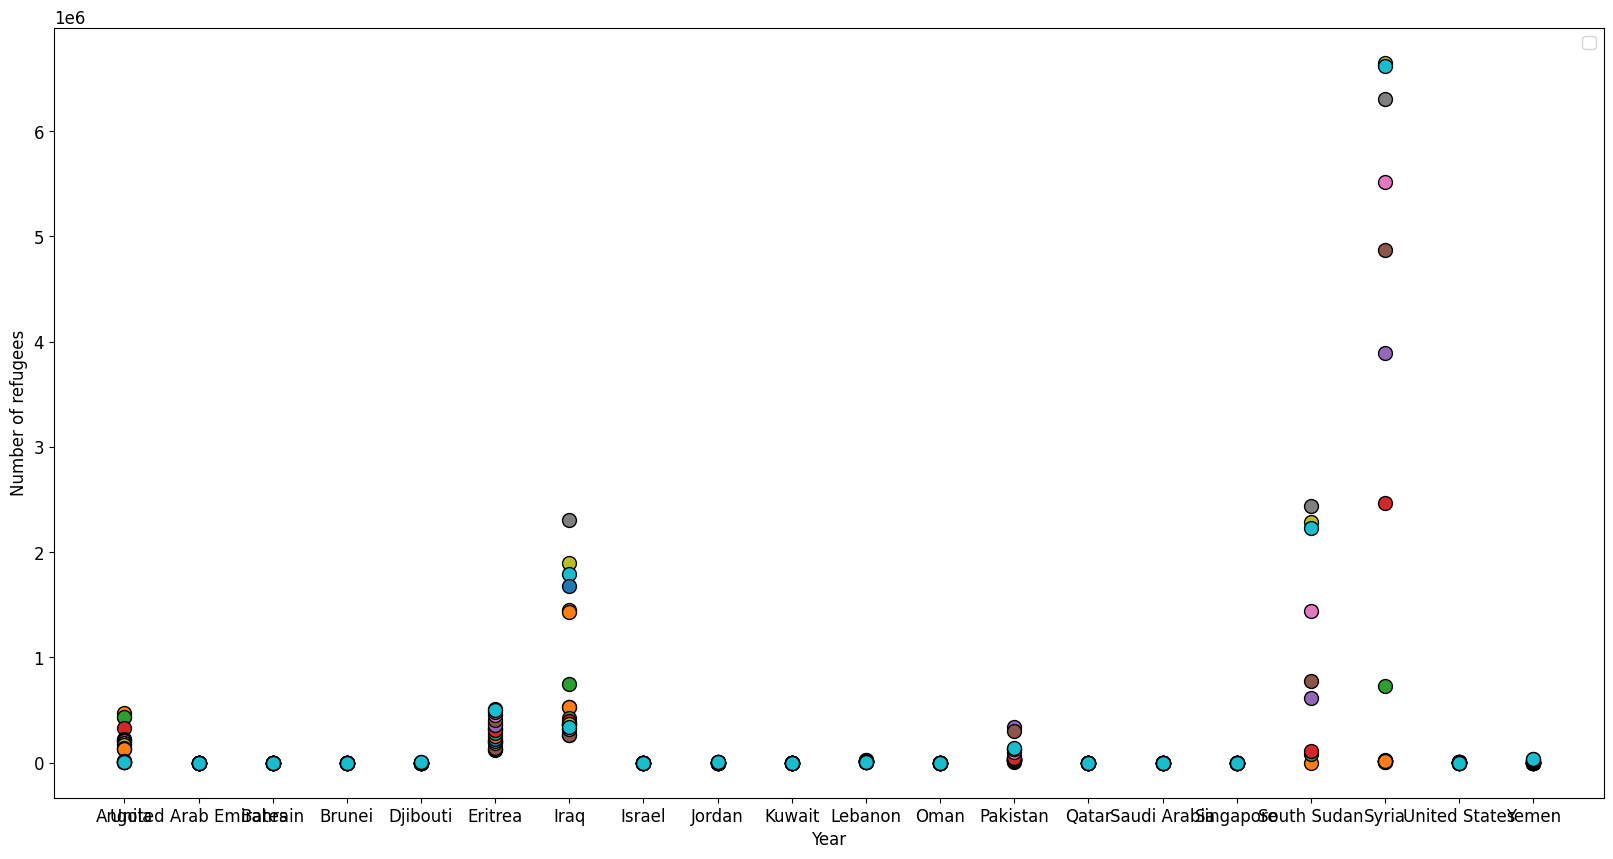

In [134]:
plt.figure(figsize = (20, 10))
plt.rcParams["font.size"] = 12
for year in range(2000, 2020, 1):
    plt.plot(unhcr_from.loc[:, str(year)], linestyle = "none", marker = "o", markeredgecolor = "black", markersize = 10)
plt.xticks(ticks = np.linspace(0, 19, num = 20), labels = unhcr_from.country)
plt.ylabel("Number of refugees")
plt.xlabel("Year")
plt.legend()
plt.show()

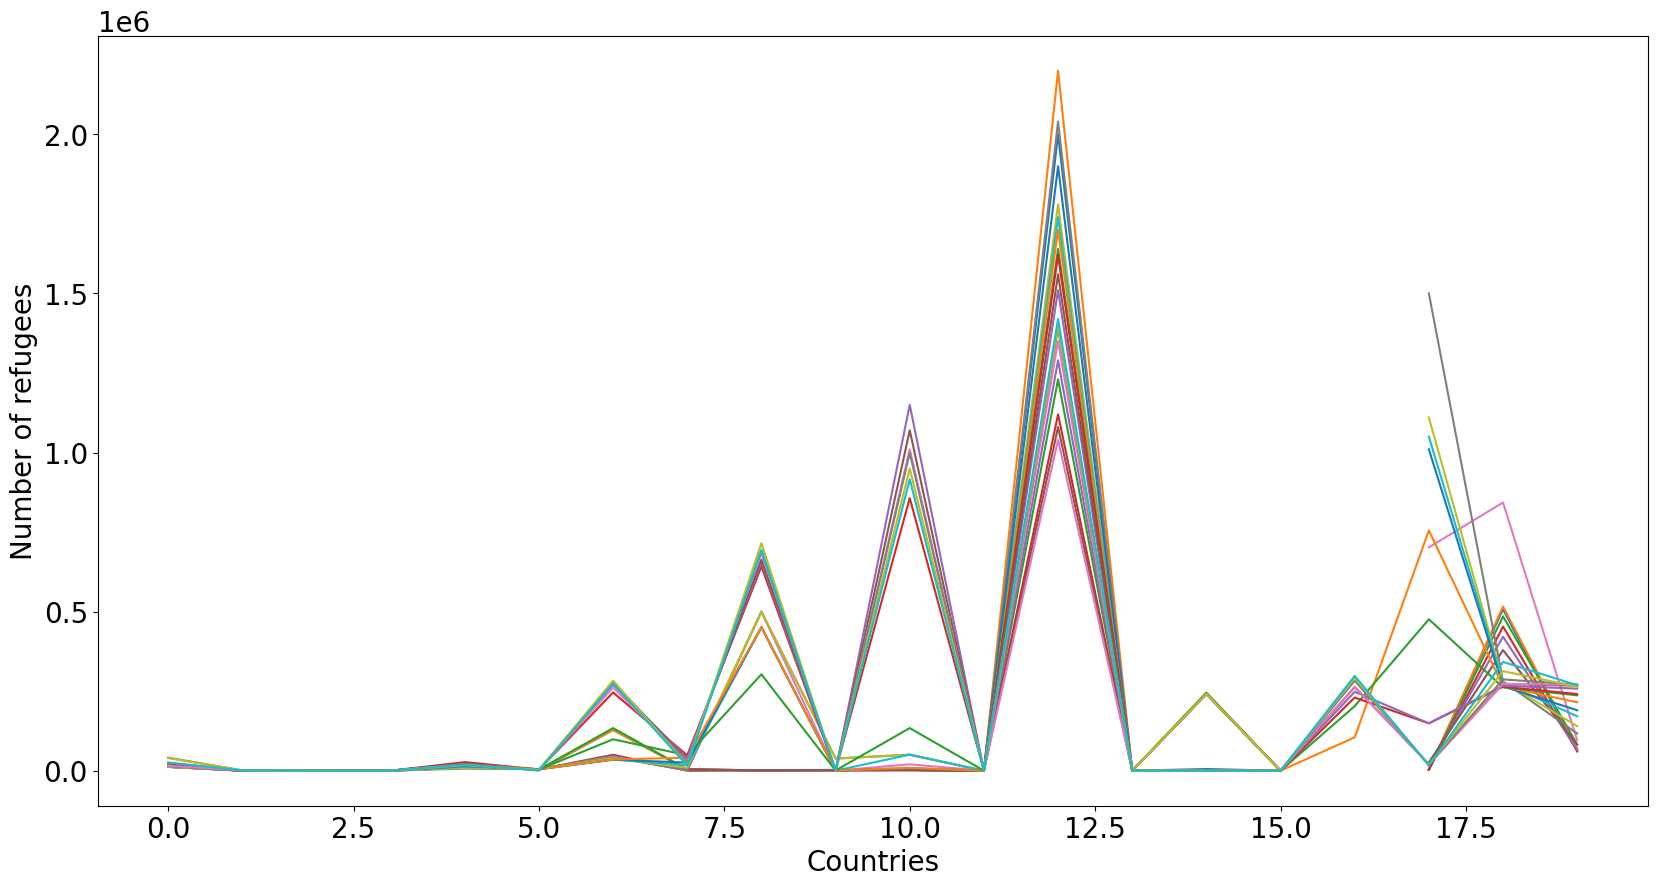

In [119]:
plt.figure(figsize = (20, 10))
plt.rcParams["font.size"] = 20
for year in range(2000, 2020, 1):
    plt.plot(unhcr_in.loc[:, str(year)])
# plt.xticks(ticks = plt.gca().get_xticklabels(), labels = unhcr_from.columns[1:])
plt.ylabel("Number of refugees")
plt.xlabel("Countries")
plt.show()

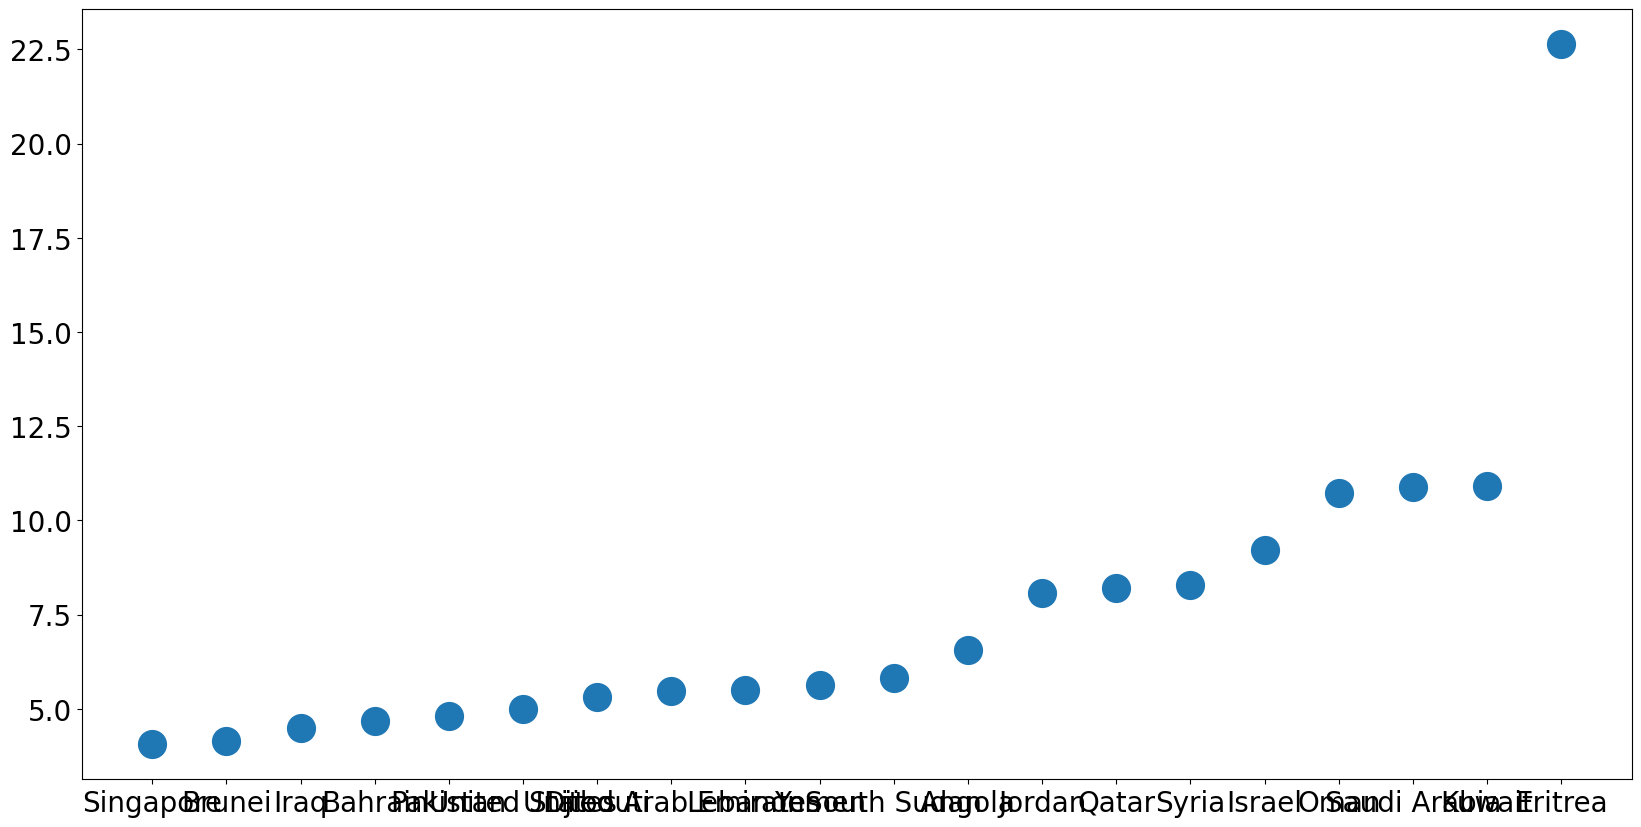

In [124]:
plt.figure(figsize = (20, 10))
plt.plot(top20, linestyle = "none", marker = "o", markersize = 20)
plt.show()